<a href="https://colab.research.google.com/gist/FinanceData/3aa28cf585aa13085524f8e8d7f5680e/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 텍스트 마이닝 04 - 한국어 텍스트 처리 (KoNLPy)

<img width="40%" src="https://i.imgur.com/AydcsdT.png">
    
### 2017 FinanceData.KR http://financedata.kr

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager
font_path = '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()

plt.rcParams["font.family"] = font_name
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (14,4)

# KoNLPy
한국어 정보처리를 위한 파이썬 패키지 ('코엔엘파이'라고 읽는다)

http://konlpy.org/ko
* 한국어 말뭉치
* 형태소 분석 및 품사 태깅

# 한국어 말뭉치 지원
* kolaw: 한국 법률 말뭉치 (constitution.txt)
* kobill: 대한민국 국회 의안 말뭉치 (1809890.txt ~ 1809899.txt)


In [0]:
from konlpy.corpus import kolaw
kolaw.fileids()

['constitution.txt']

In [0]:
c = kolaw.open('constitution.txt').read()
print(c[:500])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.

       제1장 총강
  제1조 ① 대한민국은 민주공화국이다.
②대한민국의 주권은 국민에게 있고, 


In [0]:
from konlpy.corpus import kobill
print(kobill.fileids())

['1809895.txt', '1809899.txt', '1809892.txt', '1809893.txt', '1809896.txt', '1809891.txt', '1809897.txt', '1809894.txt', '1809898.txt', '1809890.txt']


In [0]:
c = kobill.open('1809895.txt').read()
print(c[:100])

하도급거래 공정화에 관한 법률 일부개정법률안

(유선호의원 대표발의 )

 의 안
 번 호

9895

발의연월일 : 2010.  11.  15.

발  의  자 : 유선호․강기갑


# 한국어 형태소 분석기 프로젝트

http://konlpy-ko.readthedocs.io

프로젝트 | 이름 | 홈페이지
:---- | :---- | :----
한나눔 | Hannanum | http://kldp.net/hannanum/
꼬꼬마 | Kkma | http://kkma.snu.ac.kr/ 
코모란 | Komoran | http://www.shineware.co.kr/products/komoran/ 
은전한닢 | Mecab | https://bitbucket.org/eunjeon/mecab-ko/ 
트위터 | Okt | https://github.com/open-korean-text/open-korean-text

비교 http://konlpy.org/en/v0.4.4/morph/

# KoNLPy 형태소 분석기

konlpy.tag 에서 품사 태깅 패키지 5개를 제공
* Hannanum
* Kkma
* Komoran
* Mecab
* Okt

각 클래스의 주요 메소드
* morphs : 형태소 추출
* nouns : 명사 추출
* pos : pos 태깅

# KoNLPy 설치

Java가 필요하다. (OpenJDK 7 설치)
```bash
# apt update
sudo apt-get update

# OpenJDK 7
sudo apt-get install g++ openjdk-7-jdk
```

```bash
# JPype1 설치
sudo pip3 install JPype1-py3

# konlpy
sudo pip3 install konlpy
```

# 형태소 분석
형태소 : 일정한 뜻을 가진 가장 작은 말의 단위

```
창업투자회사가 강세를 보이고 있다. 정부가 창업기업 육성을 위해 벤처캐피탈을 주업으로 하는 창업투자사의 자본금 요건을 낮추는 등 규제혁신을 추진한다고 발표해서다
```

```python
[('창업', 'Noun'), ('투자', 'Noun'), ('회사', 'Noun'), ('가', 'Josa'), ('강세', 'Noun'), ('를', 'Josa'), ('보이', 'Noun'), ('고', 'Josa'), ('있다', 'Adjective'), ('.', 'Punctuation'), ('정부', 'Noun'), ('가', 'Josa'), ('창업', 'Noun'), ('기업', 'Noun'), ('육성', 'Noun'), ('을', 'Josa'), ('위해', 'Noun'), ('벤처캐피탈', 'Noun'), ('을', 'Josa'), ('주업', 'Noun'), ('으로', 'Josa'), ('하는', 'Verb'), ('창업', 'Noun'), ('투자', 'Noun'), ('사의', 'Noun'), ('자본금', 'Noun'), ('요건', 'Noun'), ('을', 'Josa'), ('낮추는', 'Verb'), ('등', 'Noun'), ('규제', 'Noun'), ('혁신', 'Noun'), ('을', 'Josa'), ('추진한', 'Verb'), ('다고', 'Eomi'), ('발표해서', 'Verb'), ('다', 'Eomi')]
```



In [0]:
from konlpy.tag import Hannanum, Kkma, Komoran, Mecab, Okt

text = """
창업투자회사가 강세를 보이고 있다. 
정부가 창업기업 육성을 위해 
벤처캐피탈을 주업으로 하는 창업투자사의 자본금 요건을 낮추는 등
규제혁신을 추진한다고 발표해서다
"""

In [0]:
engine = Hannanum()
print(engine.pos(text))

[('창업투자회사', 'N'), ('가', 'J'), ('강세', 'N'), ('를', 'J'), ('보이', 'P'), ('고', 'E'), ('있', 'P'), ('다', 'E'), ('.', 'S'), ('정부', 'N'), ('가', 'J'), ('창업기업', 'N'), ('육성', 'N'), ('을', 'J'), ('위하', 'P'), ('어', 'E'), ('벤처캐피탈', 'N'), ('을', 'J'), ('주업', 'N'), ('으로', 'J'), ('하', 'P'), ('는', 'E'), ('창업투자사의', 'N'), ('자본금', 'N'), ('요건', 'N'), ('을', 'J'), ('낮추', 'P'), ('는', 'E'), ('등', 'N'), ('규제혁신', 'N'), ('을', 'J'), ('추진', 'N'), ('하', 'X'), ('ㄴ다', 'E'), ('고', 'J'), ('발표해서', 'N'), ('이', 'J'), ('다', 'E')]


In [0]:
engines = [Hannanum(), Kkma(), Mecab(), Okt()] # Komoran(),

for e in engines:
    print(e)
    print(e.pos(text))    

[('창업투자회사', 'N'), ('가', 'J'), ('강세', 'N'), ('를', 'J'), ('보이', 'P'), ('고', 'E'), ('있', 'P'), ('다', 'E'), ('.', 'S'), ('정부', 'N'), ('가', 'J'), ('창업기업', 'N'), ('육성', 'N'), ('을', 'J'), ('위하', 'P'), ('어', 'E'), ('벤처캐피탈', 'N'), ('을', 'J'), ('주업', 'N'), ('으로', 'J'), ('하', 'P'), ('는', 'E'), ('창업투자사의', 'N'), ('자본금', 'N'), ('요건', 'N'), ('을', 'J'), ('낮추', 'P'), ('는', 'E'), ('등', 'N'), ('규제혁신', 'N'), ('을', 'J'), ('추진', 'N'), ('하', 'X'), ('ㄴ다', 'E'), ('고', 'J'), ('발표해서', 'N'), ('이', 'J'), ('다', 'E')]
[('창업', 'NNG'), ('투자', 'NNG'), ('회사', 'NNG'), ('가', 'JKS'), ('강세', 'NNG'), ('를', 'JKO'), ('보이', 'VV'), ('고', 'ECE'), ('있', 'VXV'), ('다', 'EFN'), ('.', 'SF'), ('정부', 'NNG'), ('가', 'JKS'), ('창업', 'NNG'), ('기업', 'NNG'), ('육성', 'NNG'), ('을', 'JKO'), ('위하', 'VV'), ('어', 'ECS'), ('벤처', 'NNG'), ('캐피탈', 'NNG'), ('을', 'JKO'), ('주업', 'NNG'), ('으로', 'JKM'), ('하', 'VV'), ('는', 'ETD'), ('창업', 'NNG'), ('투자', 'NNG'), ('사의', 'NNG'), ('자본금', 'NNG'), ('요건', 'NNG'), ('을', 'JKO'), ('낮추', 'VV'), ('는', 'ETD'), ('등', 'NNB'),

# 형태소 분석기 성능
* 속도, 메모리 사용, 정확도 등으로 평가
* 서로 장단점이 있는 경우가 많음
* 사전(dictionary)의 영향도 매우 큼
* 목적에 분석기+사전 조합 사용

<img width="50%" src="http://konlpy.readthedocs.io/ko/v0.4.0/_images/time.png">
    
http://konlpy.readthedocs.io/ko/v0.4.0/morph/

# Read documents

특정 분야 뉴스 텍스트 수집

In [0]:
import feedparser
import newspaper

# 경향신문 경제뉴스 RSS
rss_link = 'http://www.khan.co.kr/rss/rssdata/economy.xml'

feeds = feedparser.parse(rss_link)
links = [entry['link'] for entry in feeds['entries']]

news_text =''
for link in links:
    print(link)
    article = newspaper.Article(link, language='ko')
    article.download()
    article.parse()
    news_text += article.text

http://news.khan.co.kr/kh_news/khan_art_view.html?artid=201203251835221&code=920100
http://news.khan.co.kr/kh_news/khan_art_view.html?artid=201203251356231&code=920401
http://news.khan.co.kr/kh_news/khan_art_view.html?artid=201203251356161&code=920401
http://news.khan.co.kr/kh_news/khan_art_view.html?artid=201203251355591&code=920401
http://news.khan.co.kr/kh_news/khan_art_view.html?artid=201203251128101&code=920100
http://news.khan.co.kr/kh_news/khan_art_view.html?artid=201203231743501&code=920301
http://news.khan.co.kr/kh_news/khan_art_view.html?artid=201203231411441&code=920100
http://news.khan.co.kr/kh_news/khan_art_view.html?artid=201203231410391&code=920100
http://news.khan.co.kr/kh_news/khan_art_view.html?artid=201203231409321&code=920100
http://news.khan.co.kr/kh_news/khan_art_view.html?artid=201203231311491&code=920100
http://news.khan.co.kr/kh_news/khan_art_view.html?artid=201203231142301&code=920401
http://news.khan.co.kr/kh_news/khan_art_view.html?artid=201203231140381&code

In [0]:
print(len(news_text))
print('-' * 120)
news_text[:1000]

27213
------------------------------------------------------------------------------------------------------------------------


'ㆍ중기청장과 밤샘토론\n\n\n\n“정부가 창업 숫자를 강조하기보다 성공률을 생각해야 한다.” “좋은 제품을 개발해도 벤처기업은 판로를 뚫기가 어렵다.” “연구·개발 투자에만 2년이 걸리는데 창업자금은 3년 안에 갚으라고 한다.”\n\n\n\n지난 22일 경기 안산시 청년창업사관학교. 송종호 중소기업청장(56)과 청년창업자 및 사관학교 입교자 150여명이 밤샘토론을 벌였다. 창업자들은 현장에서 겪는 갖가지 어려움을 쏟아냈다. 자금만 찔끔 지원하고는 후속대책은 세워주지 않는 정부의 무책임에 대한 질타도 있었다. 22일 자정 시작된 토론회는 예정된 시간보다 1시간30분 늦은 23일 새벽 4시30분이 돼서야 마무리됐다.\n\n\n\n신발제조업체를 운영하는 권종익씨(29)는 “중기청에서 기술개발자금을 지원하지만 막상 개발을 마치고 양산하려는 시점에 돈이 부족해 사업이 한 템포 늦춰졌다. 게다가 신발제조업은 전략산업이 아니라는 이유로 생산단계에서는 자금을 지원하지 않는다”고 말했다.\n\n\n\n정부는 현실을 몰랐고, 의욕은 있었지만 드러난 문제에 대한 확실한 해결방안도 내놓지 못했다.\n\n\n\n송종호 청장은 “신발이 전략산업이 아닐 리 없는데…. 담당이 답을 해보라”고 하자 실무자는 “복잡해서 알아보는 데 시간이 걸린다”고 어물쩍 넘어가려 했다. 송 청장이 “끝장토론이다. 알아보고 여기서 답을 주라”고 목소리를 높이자 잠시 뒤 “신발은 전략산업에 해당하지 않는다”는 실무자의 답변이 나왔다. 송 청장은 “전략적으로 (신발산업 지원 방안을) 검토해보자”는 두루뭉술한 해법을 내놓았다.\n\n\n\n창업자금 상환기간이 촉박하다는 지적도 있었다. 곽민홍씨(36)는 “상환 조건이 1년 거치 2년 상환이다. 연구·개발 투자만 2년씩 걸리는 우리 업종의 경우 2년째부터 한 달에 400만원씩 상환하는 것이 엄청난 부담이다”라고 말했다. 중기청 김현태 융자사업처장은 “자금을 빌려주는 기업은행과 우리은행이 부담을 느끼고 있어 쉽지 않다”고 말했다. 송 청장은 “은행과 협의해 보겠다

# Tokenize

In [0]:
from konlpy.tag import Mecab

engine = Mecab() 
news_tokens = engine.morphs(news_text)

In [0]:
print(news_tokens[:100])

['ㆍ중기청장과', '밤샘', '토론', '“', '정부', '가', '창업', '숫자', '를', '강조', '하', '기', '보다', '성공', '률', '을', '생각', '해야', '한다', '.', '”', '“', '좋', '은', '제품', '을', '개발', '해도', '벤처', '기업', '은', '판로', '를', '뚫', '기', '가', '어렵', '다', '.', '”', '“', '연구', '·', '개발', '투자', '에', '만', '2', '년', '이', '걸리', '는데', '창업', '자금', '은', '3', '년', '안', '에', '갚', '으라고', '한다', '.', '”', '지난', '22', '일', '경기', '안산시', '청년', '창업', '사관', '학교', '.', '송종호', '중소기업', '청장', '(', '56', ')', '과', '청년', '창업자', '및', '사관', '학교', '입교자', '150', '여', '명', '이', '밤샘', '토론', '을', '벌였', '다', '.', '창업자', '들', '은']


# nltk.Text() 

참고 http://www.nltk.org/api/nltk.html#nltk.text.Text

In [0]:
import nltk
news = nltk.Text(news_tokens)

In [0]:
print(len(news.tokens)) # 토큰 개수
print(len(set(news.tokens))) # 고유한 토큰 개수

13166
2507


## 빈도 분포 FreqDist

In [0]:
freq_dist = news.vocab() # FreqDist (빈도 분포)
print(len(freq_dist))

2507


In [0]:
print(freq_dist.most_common(50)) # 가장 많이 등장하는 50개

[('.', 453), ('다', 450), ('이', 362), ('을', 332), ('는', 286), ('은', 222), ('에', 204), ('의', 189), ('하', 184), ('를', 181), ('고', 173), ('했', 158), ('으로', 157), ('한', 134), ('가', 120), (',', 120), ('원', 109), ('”', 105), ('“', 105), ('있', 94), ('만', 88), ('(', 88), ('도', 77), (')', 77), ('년', 73), ('에서', 72), ('등', 72), ('일', 70), ('과', 70), ('로', 66), ('가격', 65), ('1', 65), ('들', 63), ('·', 62), ('것', 61), ('인', 61), ('억', 58), ('‘', 58), ('적', 54), ('해', 53), ('’', 49), ('%', 45), ('월', 42), ('지', 41), ('정보', 40), ('기', 39), ('4', 38), ('명', 37), ('수', 37), ('었', 36)]


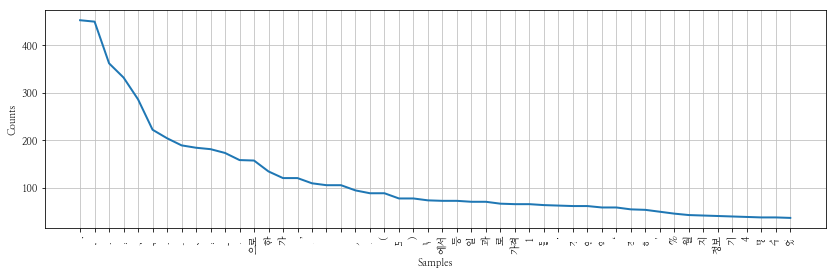

In [0]:
news.plot(50)

## count

In [0]:
news.count('가격')

65

## Dispersion plot
단어가 등장하는 위치를 Word Offset에 따라 배치하여 시각화

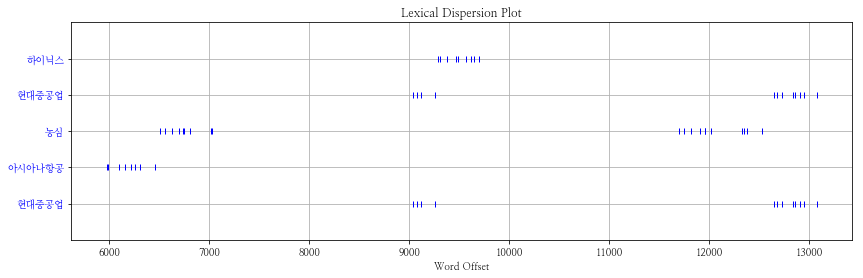

In [0]:
news.dispersion_plot(['하이닉스', '현대중공업', '농심', '아시아나항공', '현대중공업'])

# Concordance

Concordance (색인): 단어가 쓰인 문맥을 모두 찾아준다

In [0]:
news.concordance('하이닉스', lines=10)

Displaying 9 of 9 matches:
중공업 그룹 으로 한 단계 도약 한다는 성장 목표 를 밝혔 다 . 하이닉스 반도체 가 SK 그룹 편입 을 앞두 고 대대 적 인 조직 개편 과
앞두 고 대대 적 인 조직 개편 과 임원 인사 를 단행 했 다 . 하이닉스 는 22 일 중 장기 전략 수립 을 맡 는 미래 전략 실 을 신설
 을 조율 하 는 사내 컨트롤 타워 역할 을 맡 게 된다 . 특히 하이닉스 를 인수 한 SK텔레콤 의 반도체 관련 전략 담당 신설 조직 인 
Management System ) 실 을 공식 출범 시켰 다 . 하이닉스 는 “ 지난달 부터 운영 돼 온 MS 실 공식 출범 을 통해 SK
온 MS 실 공식 출범 을 통해 SK 의 현장 경영 시스템 등 을 하이닉스 에 접목 시킬 예정 ” 이 라고 설명 했 다 . 마케팅 본부 에 
 반도체 ( CIS ) 그룹 으로 분리 운영 하 기 로 했 다 . 하이닉스 는 올해 창사 후 처음 으로 낸드 플래시 투자 비중 이 50 % 
관련 반도체 사업 을 강화 할 것 으로 알려졌 다 . 이 와 함께 하이닉스 는 총 26 명 의 임원 승진 및 신규 임용 인사 발령 을 내 는
 는 한편 4 명 의 연구 · 기술 위원 도 새로 선임 했 다 . 하이닉스 관계자 는 “ 이번 조직 개편 과 임원 인사 를 통해 SK 경영 
 기능 과 해외 마케팅 역량 을 강화 했 다 ” 고 말 했 다 . 하이닉스 는 23 일 주주 총회 를 통해 SK하이닉스 로 사명 을 변경 할


# Similar word

주어진 단어와 비슷한 환경(same context)에서 쓰인(≠비슷한 뜻) 단어들

In [0]:
news.similar('농심')

아시아나항공 재산 담합 일 현대중공업 이익 특강 욕 물놀 편 ㆍ농심 답변 과징금 호응 옥션 가격 예금 반응 기록 신발


In [0]:
news.similar('하이닉스')

현대차 공정위 거래처 국세청 염두 현재 정부 재계 거래소 분위기 소비자 재정부 연비 그 광고 외교통상부 이 종교계 성명서 가슴


In [0]:
news.similar('현대중공업')

농심 아시아나항공 외벌 특강 금감원 과징금 인력난 미국 협정 내실 며 담합 많 옥션


# common_contexts

for two words used in similar contexts

In [0]:
news.common_contexts(['성장', '상승'])

로_했


# Collocations
연어(連語, collocation): 함께 위치하는 단어들 (co + location), 어휘의 조합 또는 짝을 이루는 단어

In [0]:
news.collocations()

스타퍼 액티브; 스포츠 유틸리티; 이건희 삼성전자; 이슬람 채권법; 외국인 투자자; 대상자 2003; 이명박 대통령; 임직원
5000; 윤활유 글로벌; %), 인센티브


# PoS Tagging 


In [0]:
from konlpy.tag import Mecab

engine = Mecab() 
news_tags = engine.pos(news_text)
print(news_tags[:100])

[('ㆍ중기청장과', 'UNKNOWN'), ('밤샘', 'NNG'), ('토론', 'NNG'), ('“', 'SSO'), ('정부', 'NNG'), ('가', 'JKS'), ('창업', 'NNG'), ('숫자', 'NNG'), ('를', 'JKO'), ('강조', 'NNG'), ('하', 'XSV'), ('기', 'ETN'), ('보다', 'JKB'), ('성공', 'NNG'), ('률', 'XSN'), ('을', 'JKO'), ('생각', 'NNG'), ('해야', 'XSV+EC'), ('한다', 'VX+EF'), ('.', 'SF'), ('”', 'SY'), ('“', 'SSO'), ('좋', 'VA'), ('은', 'ETM'), ('제품', 'NNG'), ('을', 'JKO'), ('개발', 'NNG'), ('해도', 'XSV+EC'), ('벤처', 'NNG'), ('기업', 'NNG'), ('은', 'JX'), ('판로', 'NNG'), ('를', 'JKO'), ('뚫', 'VV'), ('기', 'ETN'), ('가', 'JKS'), ('어렵', 'VA'), ('다', 'EF'), ('.', 'SF'), ('”', 'SY'), ('“', 'SSO'), ('연구', 'NNG'), ('·', 'SC'), ('개발', 'NNG'), ('투자', 'NNG'), ('에', 'JKB'), ('만', 'JX'), ('2', 'SN'), ('년', 'NNBC'), ('이', 'JKS'), ('걸리', 'VV'), ('는데', 'EC'), ('창업', 'NNG'), ('자금', 'NNG'), ('은', 'JX'), ('3', 'SN'), ('년', 'NNBC'), ('안', 'NNG'), ('에', 'JKB'), ('갚', 'VV'), ('으라고', 'EC'), ('한다', 'VX+EF'), ('.', 'SF'), ('”', 'SSC'), ('지난', 'VV+ETM'), ('22', 'SN'), ('일', 'NNBC'), ('경기', 'NNG'), ('안산시', 'NN

# Chunking

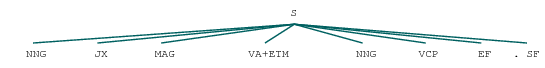

In [0]:
from konlpy.tag import Mecab

engine = Mecab() 

text = '지구는 정말 아름다운 별이다.'
tags = engine.pos(text)

parser = nltk.RegexpParser("NP: {<Adjective>*<Noun>*}")
tree = parser.parse(tags)
tree

In [0]:
tree.pprint()

(S 지구/NNG 는/JX 정말/MAG 아름다운/VA+ETM 별/NNG 이/VCP 다/EF ./SF)


# 명사 추출

In [0]:
engines = [Hannanum(), Kkma(), Mecab(), Okt()] # Komoran(),

for e in engines:
    print(e)
    print(e.nouns(news_text)[:100])

['ㆍ중기청장', '밤샘토론', '“정부', '창업', '숫자', '강조', '성공률', '생각', '”', '“좋', '제품', '개발해도', '벤처기업', '판로', '”', '“연구·개발', '투자', '2년', '창업자금', '3년', '안', '”', '22일', '경기', '안산시', '청년창업사관학교', '송종호', '중소기업청장(56)', '청년창업자', '사관학교', '입교', '150', '명', '밤샘토론', '창업자들', '현장', '어려움', '자금', '지원', '후속대책', '정부', '무책', '질타', '22일', '자정', '시작', '토론회', '예정', '시간', '1시간30분', '23일', '새벽', '4시30분', '마무리', '신발제조업체', '운영', '권종익씨(29)', '“중기청', '기술개발자금', '지원', '개발', '양산', '시점', '돈', '부족해', '사업', '템포', '신발제조업', '전략산업', '이유', '생산단계', '자금', '지원', '않는다”고', '말', '정부', '현실', '의욕', '문제', '확실', '해결방안', '송종호', '청장', '“신발', '전략산업', '리', '없는데…', '담당', '답', '해보라”고', '실무자', '“복잡해', '데', '시간', '걸린다”고', '송', '청장', '“끝장토론', '여기', '답']
['ㆍ중기청장', '밤샘', '밤샘토론', '토론', '정부', '창업', '숫자', '강조', '성공률', '생각', '제품', '개발', '벤처', '벤처기업', '기업', '판로', '연구', '투자', '2', '2년', '년', '창업자금', '자금', '3', '3년', '안', '22', '22일', '일', '경기', '안산', '안산시', '시', '청년', '청년창업사관학교', '사관', '학교', '송종', '송종호', '호', '중소기업', '중소기업청장', '청장', '56', '과', '청년창업자', '창업자', '사

In [0]:
engine = Mecab()
nouns = engine.nouns(news_text)
print(nouns[:100])

['밤샘', '토론', '정부', '창업', '숫자', '강조', '성공', '생각', '제품', '개발', '벤처', '기업', '판로', '연구', '개발', '투자', '년', '창업', '자금', '년', '안', '일', '경기', '안산시', '청년', '창업', '사관', '학교', '송종호', '중소기업', '청장', '청년', '창업자', '사관', '학교', '입교자', '명', '밤샘', '토론', '창업자', '현장', '갖가지', '어려움', '자금', '지원', '후속', '대책', '정부', '책임', '질타', '일', '자정', '시작', '토론회', '예정', '시간', '시간', '분', '일', '새벽', '시', '분', '마무리', '신발', '제조', '업체', '운영', '권종', '중기청', '기술', '개발', '자금', '지원', '개발', '양산', '시점', '돈', '부족', '사업', '템포', '신발', '제조업', '전략', '산업', '이유', '생산', '단계', '자금', '지원', '말', '정부', '현실', '의', '욕', '문제', '해결', '방안', '송종호', '청장', '신발']


In [0]:
len(nouns)

5506

In [0]:
# 1 글자는 제외
nouns = [n for n in nouns if len(n) > 1]
len(nouns)

4387

In [0]:
# 가장 많이 등장하는 명사 TOP 40
from collections import Counter

count = Counter(nouns)
tags = count.most_common(40)
print(tags[:40])

[('가격', 65), ('정보', 40), ('재산', 35), ('인상', 33), ('지난해', 30), ('기업', 30), ('시장', 29), ('투자', 27), ('업체', 26), ('장관', 21), ('담합', 21), ('농심', 20), ('정부', 20), ('제품', 20), ('라면', 20), ('증가', 19), ('경제', 18), ('회장', 18), ('공정위', 16), ('고객', 16), ('국내', 15), ('금융', 14), ('한국', 14), ('분기', 14), ('종교', 13), ('결혼', 13), ('전략', 13), ('대표', 13), ('그룹', 13), ('원장', 13), ('가계', 13), ('영업', 13), ('기준', 12), ('주식', 12), ('과세', 12), ('거래', 12), ('보유', 12), ('현대중공업', 12), ('사업', 11), ('주가', 11)]


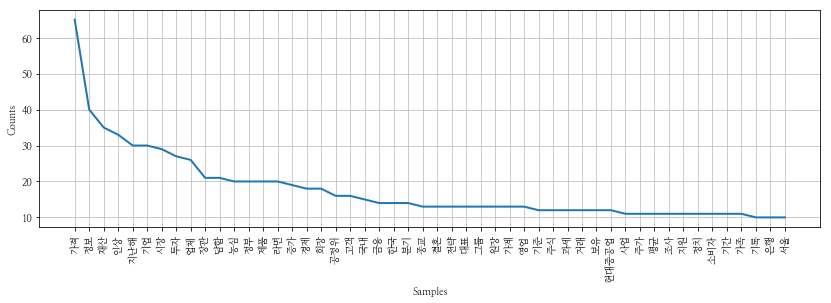

In [0]:
import nltk
news = nltk.Text(nouns)
news.plot(50)

# Summary
* KoNLPy - 말뭉치, 형태소 분석 및 품사 태깅
* 형태소 분석
* 형태소 분석기 성능
* Tokenize - engine.morphs()
* nltk.Text() 
* 빈도 분포, count, Dispersion plot
* Concordance(색인)
* Similar word (same context)
* common_contexts
* Collocations (연어)
* PoS Tagging
* Chunking
* 명사 추출 engine.nouns()

#### 2017 FinanceData.KR http://financedata.kr